In [1]:
import numpy as np
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product
import scipy.stats as stats
import matplotlib.patches as mpatches
from scipy.stats import norm
from math import ceil
import torch
from matplotlib.ticker import FormatStrFormatter
from collections import Counter

### Create theoretical population

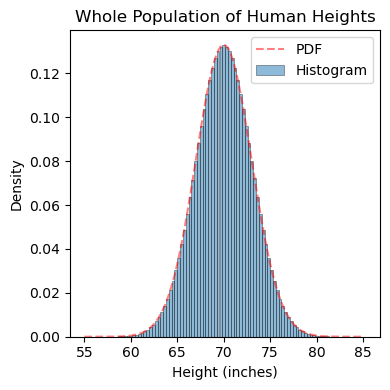

In [2]:
lowest_height_whole_pop= 55
highest_height_whole_pop = 85
mean_height_whole_pop = 70
std_height_whole_pop = 3
num_bars_whole_pop = 100
n_points_x_axis = 1000

def normal_distribution(x, mu, sigma):
    pdf_values = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return pdf_values

def create_whole_population(f_normal_distribution, lowest_height, highest_height, mean_height, std_height, n_points):
    x_values = np.linspace(lowest_height, highest_height, n_points)
    pdf_curve = [f_normal_distribution(x, mean_height, std_height) for x in x_values]
    return pd.DataFrame({'Height': x_values, 'Density': pdf_curve})

def plot_whole_population(df, num_bins, lowest_height, highest_height):
    fig, ax = plt.subplots(figsize=(4, 4))
    bin_width = (highest_height - lowest_height) / num_bins
    mid_x_values = np.linspace(lowest_height, highest_height, num_bins) + bin_width / 2
    pdf_values = [df['Density'].iloc[np.argmin(np.abs(df['Height'] - x))] for x in mid_x_values]
    ax.plot(df['Height'], df['Density'], label='PDF', color='red', linestyle='dashed', alpha=0.5, linewidth=1.5)
    ax.bar(mid_x_values, pdf_values, width=bin_width, alpha=0.5, edgecolor='black', linewidth=0.5, label='Histogram')
    ax.set_title('Whole Population of Human Heights')
    ax.set_xlabel('Height (inches)')
    ax.set_ylabel('Density')
    ax.legend()
    plt.tight_layout()
    plt.show()

# Create whole population
df_whole_pop = create_whole_population(normal_distribution, lowest_height_whole_pop, highest_height_whole_pop, 
                                       mean_height_whole_pop, std_height_whole_pop, n_points_x_axis)

# Plot whole population with histogram bars
plot_whole_population(df_whole_pop, num_bars_whole_pop, lowest_height_whole_pop, highest_height_whole_pop)

### Create mini population 01


,Height,Count,Probability
0,64.0,5,0.166667
1,70.0,20,0.666667
2,76.0,5,0.166667


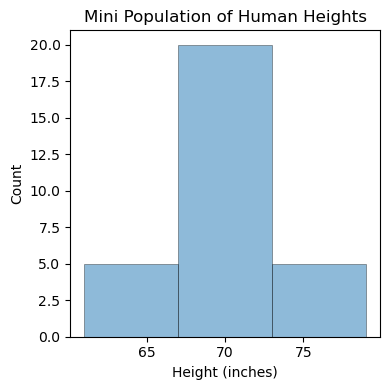

Unique elements: [64. 70. 76.]
Total count of elements: 30
Mean: 70.0
Std: 3.46


In [3]:
lowest_height_mini_pop_01= 55
mean_height_mini_pop_01 = 70
highest_height_mini_pop_01 = 85
std_height_mini_pop_01 = 3
num_bars_mini_pop_01 = 100
# approx_num_bars_mini_pop_01=9
# approx_total_count_mini_pop_01=30
approx_num_bars_mini_pop_01=5
approx_total_count_mini_pop_01=30

def create_mini_population(f_normal_distribution, start, end, n_bins, total_count, mean_height, std_height):
    bin_edges = np.linspace(start, end, n_bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
    bin_centers = np.round(bin_centers, 2)  # Round bin_centers to two decimal places
    bin_width = (end - start) / n_bins
    densities = np.array([np.mean(f_normal_distribution(np.linspace(edge, bin_edges[i+1], 100), mean_height, std_height)) for i, edge in enumerate(bin_edges[:-1])])
    float_counts = densities * total_count / sum(densities)
    int_counts = np.round(float_counts).astype(int)
    non_zero_indices = int_counts != 0
    bin_centers = bin_centers[non_zero_indices]
    int_counts = int_counts[non_zero_indices]
    probabilities = int_counts / sum(int_counts)  # Calculate probabilities
    return pd.DataFrame({'Height': bin_centers, 'Count': int_counts, 'Probability': probabilities})

def plot_mini_population(df, ax, label):
    centers = df['Height']
    counts = df['Count']
    bin_width = centers.iloc[1] - centers.iloc[0]
    ax.bar(centers, counts, width=bin_width, alpha=0.5, edgecolor='black', linewidth=0.5, label=label)
    
def calculate_weighted_mean(df_col_value, df_col_count):
    weighted_mean = (df_col_value * df_col_count).sum() / df_col_count.sum()
    return weighted_mean

def calculate_weighted_std(df_col_value, df_col_count):
    weighted_mean = (df_col_value * df_col_count).sum() / df_col_count.sum()
    squared_deviations = ((df_col_value - weighted_mean) ** 2) * df_col_count
    weighted_variance = squared_deviations.sum() / df_col_count.sum()
    weighted_std = np.sqrt(weighted_variance)
    return weighted_std


# Create mini (discretized) population
df_mini_pop_01 = create_mini_population(normal_distribution, lowest_height_mini_pop_01, highest_height_mini_pop_01, 
                                        approx_num_bars_mini_pop_01, approx_total_count_mini_pop_01, mean_height_mini_pop_01, std_height_mini_pop_01)

# Display mini population
display(df_mini_pop_01)

# Plot mini population
fig, ax = plt.subplots(figsize=(4, 4))
plot_mini_population(df_mini_pop_01, ax, "Population 1")
ax.set_title('Mini Population of Human Heights')
ax.set_xlabel('Height (inches)')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

# Summary
mean_mini_pop_01 = calculate_weighted_mean(df_mini_pop_01['Height'], df_mini_pop_01['Count'])
std_mini_pop_01 = calculate_weighted_std(df_mini_pop_01['Height'], df_mini_pop_01['Count'])

print(f"Unique elements: {df_mini_pop_01['Height'].unique()}")
print(f"Total count of elements: {df_mini_pop_01['Count'].sum()}")
print(f"Mean: {mean_mini_pop_01}")
print(f"Std: {std_mini_pop_01:.2f}")

### Create mini population 02

Mini pop 01


,Height,Count,Probability
0,64.0,5,0.166667
1,70.0,20,0.666667
2,76.0,5,0.166667


Total count of elements: 30
Mean: 70.0
Std: 3.46

Mini pop 02


,Height,Count,Probability
0,83.33,1,0.034483
1,86.67,7,0.241379
2,90.00,13,0.448276
3,93.33,7,0.241379
4,96.67,1,0.034483


Total count of elements: 29
Mean: 90.0
Std: 2.90


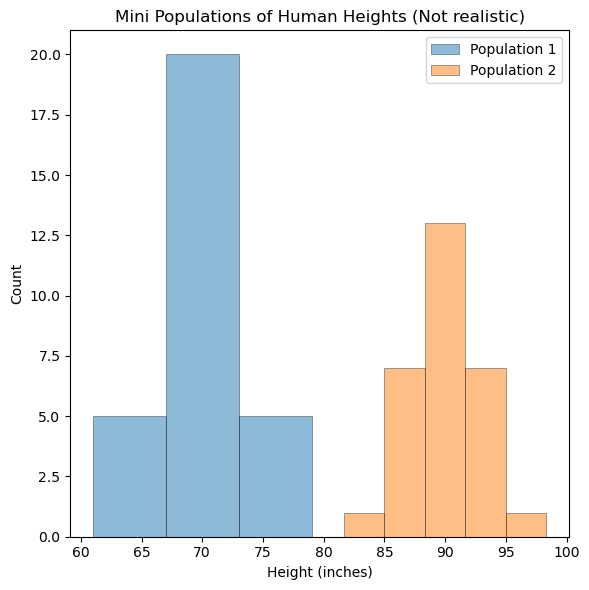

In [4]:
lowest_height_mini_pop_02= 75
mean_height_mini_pop_02 = 90
highest_height_mini_pop_02 = 105
std_height_mini_pop_02 = 3
num_bars_mini_pop_02 = 100
approx_num_bars_mini_pop_02=9
approx_total_count_mini_pop_02=30

def plot_two_mini_pops(df1, df2):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Plot the first mini population
    plot_mini_population(df1, ax, "Population 1")
    
    # Plot the second mini population
    plot_mini_population(df2, ax, "Population 2")
    
    ax.set_title('Mini Populations of Human Heights (Not realistic)')
    ax.set_xlabel('Height (inches)')
    ax.set_ylabel('Count')
    ax.legend()
    plt.tight_layout()
    plt.show()
    
# Create mini (discretized) population
df_mini_pop_02 = create_mini_population(normal_distribution, lowest_height_mini_pop_02, highest_height_mini_pop_02, 
                                        approx_num_bars_mini_pop_02, approx_total_count_mini_pop_02, mean_height_mini_pop_02, std_height_mini_pop_02)

# Summary
# Mini pop 01
mean_mini_pop_01 = calculate_weighted_mean(df_mini_pop_01['Height'], df_mini_pop_01['Count'])
std_mini_pop_01 = calculate_weighted_std(df_mini_pop_01['Height'], df_mini_pop_01['Count'])

print('Mini pop 01')
display(df_mini_pop_01)
#print(f"Unique elements: {df_mini_pop_01['Height'].unique()}")
print(f"Total count of elements: {df_mini_pop_01['Count'].sum()}")
print(f"Mean: {mean_mini_pop_01}")
print(f"Std: {std_mini_pop_01:.2f}")

print('')

# Mini pop 02
mean_mini_pop_02 = calculate_weighted_mean(df_mini_pop_02['Height'], df_mini_pop_02['Count'])
std_mini_pop_02 = calculate_weighted_std(df_mini_pop_02['Height'], df_mini_pop_02['Count'])

print('Mini pop 02')
display(df_mini_pop_02)
#print(f"Unique elements: {df_mini_pop_02['Height'].unique()}")
print(f"Total count of elements: {df_mini_pop_02['Count'].sum()}")
print(f"Mean: {mean_mini_pop_02}")
print(f"Std: {std_mini_pop_02:.2f}")

# Plot mini population
plot_two_mini_pops(df_mini_pop_01, df_mini_pop_02)

### SDSM of the mini population 01

SDSM mini pop 01 estimated by the exhaustive method:


,Combination,Mean,Probability,Mean_rectified
0,"(64.0, 64.0, 64.0, 64.0, 64.0)",64.0,0.000129,64.00
1,"(64.0, 64.0, 64.0, 64.0, 70.0)",65.2,0.000514,65.20
2,"(64.0, 64.0, 64.0, 64.0, 76.0)",66.4,0.000129,66.41
3,"(64.0, 64.0, 64.0, 70.0, 64.0)",65.2,0.000514,65.20
4,"(64.0, 64.0, 64.0, 70.0, 70.0)",66.4,0.002058,66.41
...,...,...,...,...
238,"(76.0, 76.0, 76.0, 70.0, 70.0)",73.6,0.002058,73.60
239,"(76.0, 76.0, 76.0, 70.0, 76.0)",74.8,0.000514,74.80
240,"(76.0, 76.0, 76.0, 76.0, 64.0)",73.6,0.000129,73.60
241,"(76.0, 76.0, 76.0, 76.0, 70.0)",74.8,0.000514,74.80


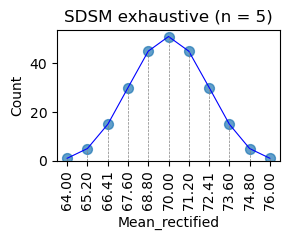

Mini pop mean: 70.00
Mini pop std: 3.46
SDSM sample size: 5
SDSM empirical SE: 1.55
SDSM theoretical SE (from mini pop std): 1.55
SDSM empirical SE/theoretical SE: 100.06%


,Mean_rectified,Total_count,Probability
0,64.00,1,0.0041
1,65.20,5,0.0206
2,66.41,15,0.0617
3,67.60,30,0.1235
4,68.80,45,0.1852
5,70.00,51,0.2099
6,71.20,45,0.1852
7,72.41,30,0.1235
8,73.60,15,0.0617
9,74.80,5,0.0206



SDSM mini pop 01 estimated by the Monte Carlo method:


,Mean,Mean_rectified
0,70.0,70.00
1,71.2,71.20
2,68.8,68.80
3,70.0,70.00
4,71.2,71.20
...,...,...
95,71.2,71.20
96,72.4,72.41
97,66.4,66.41
98,72.4,72.41


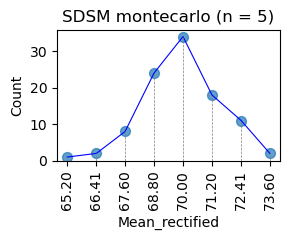

Mini pop mean: 70.00
Mini pop std: 3.46
SDSM sample size: 5
SDSM empirical SE: 1.57
SDSM theoretical SE (from mini pop std): 1.55
SDSM empirical SE/theoretical SE: 101.54%


,Mean_rectified,Total_count,Probability
0,65.20,1,0.01
1,66.41,2,0.02
2,67.60,8,0.08
3,68.80,24,0.24
4,70.00,34,0.34
5,71.20,18,0.18
6,72.41,11,0.11
7,73.60,2,0.02


In [5]:
sample_size_mini_pop_01 = 5
repetitions_montecarlo = 100

def calculate_SDSM_exhaustive(df, sample_size):
    unique_heights = df['Height'].values
    unique_probabilities = df['Probability'].values
    # Generate all possible combinations
    all_combs = list(product(unique_heights, repeat=sample_size))
    # Calculate their probabilities and mean
    probabilities = []
    means = []
    for comb in all_combs:
        prob = np.prod([unique_probabilities[np.where(unique_heights == x)[0][0]] for x in comb])
        mean = np.mean(comb)
        probabilities.append(prob)
        means.append(mean)
    # Create df_combinations
    df_combinations = pd.DataFrame({
        'Combination': all_combs,
        'Mean': means,
        'Probability': probabilities
    })
    # Round the 'Mean' column to 2 decimal places
    # df_combinations['Mean'] = df_combinations['Mean'].round(2)
    # Calculate empirical SE
    empirical_SE = np.sqrt(np.sum([p * m**2 for p, m in zip(probabilities, means)]) - np.sum([p * m for p, m in zip(probabilities, means)])**2)
    return df_combinations, empirical_SE

# To correct numerical approximations after the mean is calculated
# def rectify_df_combinations(df_combinations):
#     df_combinations_copy = df_combinations.copy(deep=True)
#     # Initialize the new Mean_rectified column with zeros
#     df_combinations_copy['Mean_rectified'] = 0.0
#     # Calculate the new Mean_rectified values
#     for idx, row in df_combinations_copy.iterrows():
#         current_mean = row['Mean']
#         current_mean_ceiled = np.round(np.ceil(current_mean * 100) / 100, 2)
#         is_within_0_01 = np.abs(df_combinations_copy['Mean'].apply(lambda x: np.round(np.ceil(x * 100) / 100, 2)) - current_mean_ceiled) < 0.011
#         is_greater = df_combinations_copy['Mean'].apply(lambda x: np.round(np.ceil(x * 100) / 100, 2)) > current_mean_ceiled
#         mean_adjusted = (is_within_0_01 & is_greater).any()
#         df_combinations_copy.at[idx, 'Mean_rectified'] = current_mean_ceiled + 0.01 if mean_adjusted else current_mean_ceiled
#     probabilities = df_combinations_copy['Probability'].values
#     mean_rectified_values = df_combinations_copy['Mean_rectified'].values
#     weighted_mean = np.sum(probabilities * mean_rectified_values)
#     weighted_var = np.sum(probabilities * (mean_rectified_values - weighted_mean)**2)
#     empirical_SE = np.sqrt(weighted_var)
#     return df_combinations_copy, empirical_SE
def rectify_df_combinations(df_combinations):
    df_combinations_copy = df_combinations.copy(deep=True)
    # Initialize the new Mean_rectified column with zeros
    df_combinations_copy['Mean_rectified'] = 0.0
    # Calculate the new Mean_rectified values
    for idx, row in df_combinations_copy.iterrows():
        current_mean = row['Mean']
        current_mean_ceiled = np.round(np.ceil(current_mean * 100) / 100, 2)
        is_within_0_01 = np.abs(df_combinations_copy['Mean'].apply(lambda x: np.round(np.ceil(x * 100) / 100, 2)) - current_mean_ceiled) < 0.011
        is_greater = df_combinations_copy['Mean'].apply(lambda x: np.round(np.ceil(x * 100) / 100, 2)) > current_mean_ceiled
        mean_adjusted = (is_within_0_01 & is_greater).any()
        df_combinations_copy.at[idx, 'Mean_rectified'] = np.ceil(current_mean_ceiled) if mean_adjusted else current_mean_ceiled
    # Check if 'Probability' column exists in df_combinations (exhaustive method)
    if 'Probability' in df_combinations_copy.columns: 
        probabilities = df_combinations_copy['Probability'].values
        means = df_combinations_copy['Mean_rectified'].values
        empirical_SE = np.sqrt(np.sum([p * m**2 for p, m in zip(probabilities, means)]) - np.sum([p * m for p, m in zip(probabilities, means)])**2)
    else: # (monte carlo method)
        empirical_SE = df_combinations_copy['Mean_rectified'].std()
    return df_combinations_copy, empirical_SE

# Calculate SDSM by the Monte Carlo method (repeated random sampling)
def calculate_SDSM_montecarlo(df, sample_size, title, num_samples):
    # Extract the height and probability data
    heights = df['Height'].values
    probabilities = df['Probability'].values
    # Initialize an array to store the sample means
    sample_means = np.zeros(num_samples)
    # Generate sample means according to the given probabilities
    for i in range(num_samples):
        random_sample = np.random.choice(heights, size=sample_size, p=probabilities)
        sample_means[i] = np.mean(random_sample)
    # Calculate the empirical Standard Error (SE)
    empirical_SE = np.std(sample_means, ddof=1)
    # Create a df with the sample means
    df_combinations = pd.DataFrame({'Mean': sample_means})
    return df_combinations, empirical_SE 

# def calculate_SDSM_montecarlo(df, sample_size, title, num_samples):
#     # Extract the height and probability data
#     heights = df['Height'].values
#     probabilities = df['Probability'].values
    
#     # Initialize an array to store the sample means
#     sample_means = np.zeros(num_samples)
    
#     # Generate sample means according to the given probabilities
#     for i in range(num_samples):
#         random_sample = np.random.choice(heights, size=sample_size, p=probabilities)
#         sample_means[i] = np.mean(random_sample)
    
#     # Create a temporary DataFrame with the sample means
#     temp_df = pd.DataFrame({'Mean': sample_means})
    
#     # Group by the same means and calculate probabilities
#     total_samples = num_samples
#     probabilities = temp_df['Mean'].value_counts(normalize=True).reset_index()
#     probabilities.columns = ['Mean', 'Probability']
    
#     # Calculate the empirical Standard Error (SE)
#     empirical_SE = np.std(sample_means, ddof=1)
    
#     return probabilities, empirical_SE

# Calculate SDSM by the Monte Carlo method using parallel computing
def calculate_SDSM_montecarlo_torch(df, sample_size, repetitions):
    heights = torch.tensor(df['Height'].values, dtype=torch.float)
    probabilities = torch.tensor(df['Probability'].values, dtype=torch.float)
    dist = torch.distributions.Categorical(probs=probabilities)
    random_indices = dist.sample((repetitions, sample_size))
    random_samples = torch.index_select(heights, 0, random_indices.flatten()).view(repetitions, sample_size)
    sample_means = torch.mean(random_samples, dim=1)
    empirical_SE = np.std(sample_means.cpu().numpy(), ddof=1)
    # Create a df with the sample means
    df_combinations = pd.DataFrame({'Mean': sample_means})
    return df_combinations, empirical_SE

# def calculate_SDSM_montecarlo_torch(df, sample_size, repetitions):
#     heights = torch.tensor(df['Height'].values, dtype=torch.float)
#     probabilities = torch.tensor(df['Probability'].values, dtype=torch.float)
#     dist = torch.distributions.Categorical(probs=probabilities)
#     random_indices = dist.sample((repetitions, sample_size))
#     random_samples = torch.index_select(heights, 0, random_indices.flatten()).view(repetitions, sample_size)
#     sample_means = torch.mean(random_samples, dim=1)
#     empirical_SE = np.std(sample_means.cpu().numpy(), ddof=1)
    
#     # Create a tensor of repeated probabilities
#     repeated_probabilities = probabilities.repeat(repetitions)
    
#     # Create a DataFrame with 'Mean' and 'Probability' columns
#     df_combinations = pd.DataFrame({
#         'Mean': sample_means.cpu().numpy(),
#         'Probability': repeated_probabilities.cpu().numpy()
#     })
    
#     return df_combinations, empirical_SE

def plot_sdsm(df_combinations, sample_size, title, column_name='Mean'):
    # Group by the mean and count the occurrences
    mean_counts = df_combinations.groupby(column_name).size().reset_index(name='Counts')
    # Plotting
    fig, ax = plt.subplots(figsize=(3, 2.5))
    ax.scatter(mean_counts[column_name], mean_counts['Counts'], alpha=0.7, s=50)
    ax.plot(mean_counts[column_name], mean_counts['Counts'], color='blue', linewidth=0.8)
    for _, row in mean_counts.iterrows():
        ax.plot([row[column_name], row[column_name]], [0, row['Counts']], linestyle='--', color='grey', linewidth=0.5)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_title(title)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Count')
    if len(mean_counts[column_name]) > 30:
        ax.set_xticks(np.linspace(mean_counts[column_name].min(), mean_counts[column_name].max(), 10))
    else:
        ax.set_xticks(mean_counts[column_name].values)
    ax.set_ylim(0,)
    if len(mean_counts[column_name]) > 4:
        ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

def generate_mean_summary_df(df_combinations, column_name):
    mean_summary = df_combinations.groupby(column_name).size().reset_index(name='Total_count')
    mean_summary['Probability'] = mean_summary['Total_count'] / mean_summary['Total_count'].sum()
    mean_summary['Probability'] = mean_summary['Probability'].round(4)
    return mean_summary

def compare_empirical_estimated_SE(mean_pop, empirical_SE, pop_std, sample_size):
    theoretical_SE = pop_std / np.sqrt(sample_size)
    print(f"Mini pop mean: {mean_pop:.2f}")
    print(f"Mini pop std: {pop_std:.2f}")
    print(f"SDSM sample size: {sample_size}")
    print(f"SDSM empirical SE: {empirical_SE:.2f}")
    print(f"SDSM theoretical SE (from mini pop std): {theoretical_SE:.2f}")
    print(f"SDSM empirical SE/theoretical SE: {(empirical_SE/theoretical_SE) * 100:.2f}%")

# Calculate SDSM by the exhaustive method (create all possible score combinations and calculate their means of mini pop 01 )    
print('SDSM mini pop 01 estimated by the exhaustive method:')
df_sdsm_mini_pop_01_exhaustive_temp, _ = calculate_SDSM_exhaustive(df_mini_pop_01, sample_size_mini_pop_01)
df_sdsm_mini_pop_01_exhaustive, SE_mini_pop_01_exhaustive = rectify_df_combinations(df_sdsm_mini_pop_01_exhaustive_temp)
display(df_sdsm_mini_pop_01_exhaustive)
plot_sdsm(df_sdsm_mini_pop_01_exhaustive, sample_size_mini_pop_01, f"SDSM exhaustive (n = {sample_size_mini_pop_01})", column_name='Mean_rectified')
compare_empirical_estimated_SE(mean_mini_pop_01, SE_mini_pop_01_exhaustive, std_mini_pop_01, sample_size_mini_pop_01)
display(generate_mean_summary_df(df_sdsm_mini_pop_01_exhaustive, "Mean_rectified"))

print('\nSDSM mini pop 01 estimated by the Monte Carlo method:')
df_sdsm_mini_pop_01_montecarlo_temp, SE_mini_pop_01_montecarlo_temp = calculate_SDSM_montecarlo(df_mini_pop_01, sample_size_mini_pop_01, "title", repetitions_montecarlo)
df_sdsm_mini_pop_01_montecarlo, SE_mini_pop_01_montecarlo = rectify_df_combinations(df_sdsm_mini_pop_01_montecarlo_temp)
display(df_sdsm_mini_pop_01_montecarlo)
plot_sdsm(df_sdsm_mini_pop_01_montecarlo, sample_size_mini_pop_01, f"SDSM montecarlo (n = {sample_size_mini_pop_01})", column_name='Mean_rectified')
compare_empirical_estimated_SE(mean_mini_pop_01, SE_mini_pop_01_montecarlo, std_mini_pop_01, sample_size_mini_pop_01)
display(generate_mean_summary_df(df_sdsm_mini_pop_01_montecarlo, "Mean_rectified"))

### SDSM of the mini population 02

In [ ]:
sample_size_mini_pop_02 = 5

# Calculate SDSM by the exhaustive method (create all possible score combinations and calculate their means of mini pop 02 )    
print('SDSM mini pop 02 estimated by the exhaustive method:')
df_sdsm_mini_pop_02_exhaustive_temp, _ = calculate_SDSM_exhaustive(df_mini_pop_02, sample_size_mini_pop_02)
df_sdsm_mini_pop_02_exhaustive, SE_mini_pop_02_exhaustive = rectify_df_combinations(df_sdsm_mini_pop_02_exhaustive_temp)
display(df_sdsm_mini_pop_02_exhaustive)
plot_sdsm(df_sdsm_mini_pop_02_exhaustive, sample_size_mini_pop_02, f"SDSM exhaustive (n = {sample_size_mini_pop_02})", column_name='Mean_rectified')
print(df_sdsm_mini_pop_02_exhaustive['Mean_rectified'].unique())
compare_empirical_estimated_SE(mean_mini_pop_02, SE_mini_pop_02_exhaustive, std_mini_pop_02, sample_size_mini_pop_02)
display(generate_mean_summary_df(df_sdsm_mini_pop_02_exhaustive, "Mean_rectified"))

# print('\nSDSM mini pop 02 estimated by the Monte Carlo method:')
# df_sdsm_mini_pop_02_montecarlo_temp, SE_mini_pop_02_montecarlo_temp = calculate_SDSM_montecarlo(df_mini_pop_02, sample_size_mini_pop_02, "title", repetitions_montecarlo)
# df_sdsm_mini_pop_02_montecarlo, SE_mini_pop_02_montecarlo = rectify_df_combinations(df_sdsm_mini_pop_02_montecarlo_temp)
# display(df_sdsm_mini_pop_02_montecarlo)
# plot_sdsm(df_sdsm_mini_pop_02_montecarlo, sample_size_mini_pop_02, f"SDSM montecarlo (n = {sample_size_mini_pop_02})", column_name='Mean_rectified')
# compare_empirical_estimated_SE(mean_mini_pop_02, SE_mini_pop_02_montecarlo, std_mini_pop_02, sample_size_mini_pop_02)
# display(generate_mean_summary_df(df_sdsm_mini_pop_02_montecarlo, "Mean_rectified"))

In [ ]:
def rectify_df_combinations(df_combinations):
    df_combinations_copy = df_combinations.copy(deep=True)
    # Initialize the new Mean_rectified column with zeros
    df_combinations_copy['Mean_rectified'] = 0.0
    # Calculate the new Mean_rectified values
    for idx, row in df_combinations_copy.iterrows():
        current_mean = row['Mean']
        current_mean_ceiled = np.round(np.ceil(current_mean * 100) / 100, 2)
        is_within_0_01 = np.abs(df_combinations_copy['Mean'].apply(lambda x: np.round(np.ceil(x * 100) / 100, 2)) - current_mean_ceiled) < 0.011
        is_greater = df_combinations_copy['Mean'].apply(lambda x: np.round(np.ceil(x * 100) / 100, 2)) > current_mean_ceiled
        mean_adjusted = (is_within_0_01 & is_greater).any()
        df_combinations_copy.at[idx, 'Mean_rectified'] = np.ceil(current_mean_ceiled) if mean_adjusted else current_mean_ceiled
    # Check if 'Probability' column exists in df_combinations (exhaustive method)
    if 'Probability' in df_combinations_copy.columns: 
        probabilities = df_combinations_copy['Probability'].values
        means = df_combinations_copy['Mean_rectified'].values
        empirical_SE = np.sqrt(np.sum([p * m**2 for p, m in zip(probabilities, means)]) - np.sum([p * m for p, m in zip(probabilities, means)])**2)
    else: # (monte carlo method)
        empirical_SE = df_combinations_copy['Mean_rectified'].std()
    return df_combinations_copy, empirical_SE


df = df_sdsm_mini_pop_02_exhaustive.copy(deep=True)
display(generate_mean_summary_df(df, "Mean"))
df_rect = rectify_df_combinations(df)
display(df_rect)
#display(generate_mean_summary_df(df_rect, "Mean_rectified"))

### Get samples of mini population 01

In [ ]:
size_sample_mini_pop_01 = 10
alpha_mini_pop_01 = 0.05

def generate_random_sample(df_mini_pop, sample_size):
    normalized_probabilities = df_mini_pop['Probability'] / df_mini_pop['Probability'].sum()
    sampled_means = np.random.choice(df_mini_pop['Height'], size=sample_size, p=normalized_probabilities)
    unique_values, counts = np.unique(sampled_means, return_counts=True)
    sampled_df = pd.DataFrame({'Height': unique_values, 'Count': counts})
    return sampled_df

def calculate_sample_z_score(sample_mean, population_mean, population_std):
    sample_z_score = (sample_mean - population_mean) / population_std
    return sample_z_score

def plot_z_distribution(sample_z_score, alpha, title):
    x = np.linspace(-4, 4, 400)  # Range of z-scores
    plt.figure(figsize=(5, 3))
    plt.plot(x, stats.norm.pdf(x), color='blue', label='Z-Distribution')
    x_fill = np.linspace(-4, -abs(stats.norm.ppf(alpha/2)), 100)  # Area to shade above alpha/2 on the left tail
    plt.fill_between(x_fill, stats.norm.pdf(x_fill), color='blue', alpha=0.2)
    x_fill = np.linspace(abs(stats.norm.ppf(alpha/2)), 4, 100)  # Area to shade above alpha/2 on the right tail
    plt.fill_between(x_fill, stats.norm.pdf(x_fill), color='blue', alpha=0.2)
    plt.scatter(sample_z_score, 0, color='red', label=f'Sample Z-Score', zorder=5)
    # Add texts for p < alpha and p > alpha
    plt.text(-3.5, 0.02, r'$p < \alpha/2$', fontsize=12, ha='center', color='black')
    plt.text(3.5, 0.02, r'$p < \alpha/2$', fontsize=12, ha='center', color='black')
    plt.xlabel('Z-Score')
    plt.ylabel('Density')
    plt.title(title)
    alpha_x = abs(stats.norm.ppf(alpha/2))
    alpha_patch = mpatches.Patch(color='blue', alpha=0.2, label=f'$\\alpha$/2 ({alpha * 100}%): $\\pm${alpha_x:.2f}')
    plt.legend(handles=[alpha_patch], loc='upper right', bbox_to_anchor=(1.5, 1))
    plt.grid(True)
    plt.show()
    
def decision_z_distribution(mean_pop, mean_sample, sample_z_score, sample_size, alpha):
    df = sample_size - 1
    # Calculate the two-tailed p-value
    p_value = 2 * (1 - norm.cdf(abs(sample_z_score)))
    print(f"Decision: Because z({df}) = {sample_z_score:.4f}, p = {p_value:.4f} < {alpha} (two-tailed z-test),", end=" ")
    if p_value < alpha:
         print(f"the null hypothesis can be rejected.\nThe sample mean (= {mean_sample}) is significantly different from the population mean (= {mean_pop}).")
    else:
        print(f"the null hypothesis can NOT be rejected.\nThe sample mean ( ={mean_sample}) is NOT significantly different from the population mean (= {mean_pop}).")
        
# Random sample following the normal probabilites
df_random_sample_mini_pop_01 = generate_random_sample(df_mini_pop_01, size_sample_mini_pop_01)
mean_random_sample_mini_pop_01 = calculate_weighted_mean(df_random_sample_mini_pop_01['Height'], df_random_sample_mini_pop_01['Count']).round(4)
std_random_sample_mini_pop_01 = calculate_weighted_std(df_random_sample_mini_pop_01['Height'], df_random_sample_mini_pop_01['Count']).round(4)
z_score_random_sample_mini_pop_01 = calculate_sample_z_score(mean_random_sample_mini_pop_01, mean_mini_pop_01, std_mini_pop_01)
print("Mini pop 01\n")
print(f"Mean: {mean_mini_pop_01}")
print(f"Std: {std_mini_pop_01:.2f}")
print("\nRandom sample ")
display(df_random_sample_mini_pop_01)
print(f"Sample size: {df_random_sample_mini_pop_01['Count'].sum()}")
print(f"Mean: {mean_random_sample_mini_pop_01}")
print(f"Std: {std_random_sample_mini_pop_01:.2f}")
print(f"Z-score: {z_score_random_sample_mini_pop_01:.2f}")
plot_z_distribution(z_score_random_sample_mini_pop_01, alpha_mini_pop_01, 'Z-Distribution mini pop 01')
decision_z_distribution(mean_mini_pop_01, mean_random_sample_mini_pop_01, z_score_random_sample_mini_pop_01, size_sample_mini_pop_01, alpha_mini_pop_01)
          
# Extreme sample
extreme_sample_mini_pop_01_dict = {'Height': [df_mini_pop_01['Height'].iloc[-1]], 'Count': [size_sample_mini_pop_01]}
df_extreme_sample_mini_pop_01 = pd.DataFrame(extreme_sample_mini_pop_01_dict)
mean_extreme_sample_mini_pop_01 = calculate_weighted_mean(df_extreme_sample_mini_pop_01['Height'], df_extreme_sample_mini_pop_01['Count']).round(4)
std_extreme_sample_mini_pop_01 = calculate_weighted_std(df_extreme_sample_mini_pop_01['Height'], df_extreme_sample_mini_pop_01['Count']).round(4)
z_score_extreme_sample_mini_pop_01 = calculate_sample_z_score(mean_extreme_sample_mini_pop_01, mean_mini_pop_01, std_mini_pop_01)
print("\nExtreme sample ")
display(df_extreme_sample_mini_pop_01)
print(f"Sample size: {df_extreme_sample_mini_pop_01['Count'].sum()}")
print(f"Mean: {mean_extreme_sample_mini_pop_01}")
print(f"Std: {std_extreme_sample_mini_pop_01:.2f}")
print(f"Z-score: {z_score_extreme_sample_mini_pop_01:.2f}")
plot_z_distribution(z_score_extreme_sample_mini_pop_01, alpha_mini_pop_01, 'Z-Distribution mini pop 01')
decision_z_distribution(mean_mini_pop_01, mean_extreme_sample_mini_pop_01, z_score_extreme_sample_mini_pop_01, size_sample_mini_pop_01, alpha_mini_pop_01)

### Get samples of mini population 02

In [ ]:
size_sample_mini_pop_02 = 10
alpha_mini_pop_02 = 0.05

# Random sample following the normal probabilites
df_random_sample_mini_pop_02 = generate_random_sample(df_mini_pop_02, size_sample_mini_pop_02)
mean_random_sample_mini_pop_02 = calculate_weighted_mean(df_random_sample_mini_pop_02['Height'], df_random_sample_mini_pop_02['Count']).round(4)
std_random_sample_mini_pop_02 = calculate_weighted_std(df_random_sample_mini_pop_02['Height'], df_random_sample_mini_pop_02['Count']).round(4)
z_score_random_sample_mini_pop_02 = calculate_sample_z_score(mean_random_sample_mini_pop_02, mean_mini_pop_02, std_mini_pop_02)
print("Mini pop 02\n")
print(f"Mean: {mean_mini_pop_02}")
print(f"Std: {std_mini_pop_02:.2f}")
print("\nRandom sample ")
display(df_random_sample_mini_pop_02)
print(f"Sample size: {df_random_sample_mini_pop_02['Count'].sum()}")
print(f"Mean: {mean_random_sample_mini_pop_02}")
print(f"Std: {std_random_sample_mini_pop_02:.2f}")
print(f"Z-score: {z_score_random_sample_mini_pop_02:.2f}")
plot_z_distribution(z_score_random_sample_mini_pop_02, alpha_mini_pop_02, 'Z-Distribution mini pop 02')
decision_z_distribution(mean_mini_pop_02, mean_random_sample_mini_pop_02, z_score_random_sample_mini_pop_02, size_sample_mini_pop_02, alpha_mini_pop_02)

# Extreme sample
extreme_sample_mini_pop_02_dict = {'Height': [df_mini_pop_02['Height'].iloc[-1]], 'Count': [size_sample_mini_pop_02]}
df_extreme_sample_mini_pop_02 = pd.DataFrame(extreme_sample_mini_pop_02_dict)
mean_extreme_sample_mini_pop_02 = calculate_weighted_mean(df_extreme_sample_mini_pop_02['Height'], df_extreme_sample_mini_pop_02['Count']).round(4)
std_extreme_sample_mini_pop_02 = calculate_weighted_std(df_extreme_sample_mini_pop_02['Height'], df_extreme_sample_mini_pop_02['Count']).round(4)
z_score_extreme_sample_mini_pop_02 = calculate_sample_z_score(mean_extreme_sample_mini_pop_02, mean_mini_pop_02, std_mini_pop_02)
print("\nExtreme sample ")
display(df_extreme_sample_mini_pop_02)
print(f"Sample size: {df_extreme_sample_mini_pop_02['Count'].sum()}")
print(f"Mean: {mean_extreme_sample_mini_pop_02}")
print(f"Std: {std_extreme_sample_mini_pop_02:.2f}")
print(f"Z-score: {z_score_extreme_sample_mini_pop_02:.2f}")
plot_z_distribution(z_score_extreme_sample_mini_pop_02, alpha_mini_pop_02, 'Z-Distribution mini pop 02')
decision_z_distribution(mean_mini_pop_02, mean_extreme_sample_mini_pop_02, z_score_extreme_sample_mini_pop_02, size_sample_mini_pop_02, alpha_mini_pop_02)

### One sample t-test
We pretend that we don't know the population std. The SDMS is built using the sample.

#### SDMS t-test sample mini pop 01

In [ ]:
# import torch
# import numpy as np
# from itertools import product
# import pandas as pd
# import time

# def calculate_SE_efficiently(df, sample_size):
#     unique_scores = df['Height'].unique()
#     all_combs = np.array(list(product(unique_scores, repeat=sample_size)), dtype=np.float64)
#     means = np.mean(all_combs, axis=1)
#     SE = np.std(means)
#     return SE

# def calculate_SE_efficiently_torch(df, sample_size):
#     # Convert unique scores to a PyTorch tensor and move it to GPU if available
#     unique_scores = torch.tensor(df['Height'].unique(), dtype=torch.float64).cuda() if torch.cuda.is_available() else torch.tensor(df['Height'].unique(), dtype=torch.float64)
#     # Create all possible combinations and move them to GPU if available
#     all_combs = torch.tensor(list(product(unique_scores.cpu().numpy(), repeat=sample_size)), dtype=torch.float64).cuda() if torch.cuda.is_available() else torch.tensor(list(product(unique_scores.cpu().numpy(), repeat=sample_size)), dtype=torch.float64)
#     # Calculate the mean along axis 1
#     means = torch.mean(all_combs, axis=1)
#     # Calculate the standard deviation of the means to get SE
#     SE = torch.std(means)
#     return SE.item()  # Convert the result back to a Python native type

# # Test example


# # Create a sample DataFrame
# df = pd.DataFrame({'Height': [170, 180, 190, 200, 210]})
# sample_size = 10

# print(f"Sample size: {sample_size}")
# # CPU
# start_time = time.time()
# SE = calculate_SE_efficiently(df, sample_size)
# end_time = time.time()
# print("Time taken using NumPy (CPU):", end_time - start_time)
# print(f"The calculated SE is: {SE}")

# # GPU
# start_time = time.time()
# SE = calculate_SE_efficiently_torch(df, sample_size)
# end_time = time.time()
# print("Time taken using NumPy (GPU):", end_time - start_time)
# print(f"The calculated SE is: {SE}")

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Parameters for the original distribution
original_mean = 10
original_std_dev = 2

# Number of random variables to sum up (sample size for each sample mean)
n = 10

# Number of times to compute the sample mean (number of samples)
num_samples = 1000

# Initialize an empty array to store sample means
sample_means = np.zeros(num_samples)

# Generate sample means
for i in range(num_samples):
    random_sample = np.random.normal(original_mean, original_std_dev, n)
    sample_means[i] = np.mean(random_sample)

# Theoretical mean and standard deviation for the sampling distribution of the sample mean
theoretical_mean = original_mean
theoretical_std_dev = original_std_dev / np.sqrt(n)

# Plot the distribution of sample means
sns.histplot(sample_means, bins=50, kde=True, label='Empirical DSM')

# Overlay the theoretical normal distribution
x = np.linspace(min(sample_means), max(sample_means), 100)
y = norm.pdf(x, theoretical_mean, theoretical_std_dev)
plt.plot(x, y, label='Theoretical DSM')
plt.legend()

# Display the empirical and theoretical standard deviations
empirical_std_dev = np.std(sample_means)
print(f'Empirical standard deviation of sample means: {empirical_std_dev}')
print(f'Theoretical standard deviation of sample means: {theoretical_std_dev}')

plt.show()


In [ ]:
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Given population
population = np.array([1, 2, 3, 4, 5])

# Sample size
n = 2

# Calculate theoretical mean and standard deviation of the SDSM
original_mean = np.mean(population)
original_std_dev = np.std(population)
theoretical_mean = original_mean
theoretical_std_dev = original_std_dev / np.sqrt(n)

# Generate all possible combinations of n elements from the population
all_combinations = list(combinations(population, n))

# Initialize an array to store the means of all combinations
sample_means = np.zeros(len(all_combinations))

# Calculate the means of all combinations
for i, comb in enumerate(all_combinations):
    sample_means[i] = np.mean(comb)

# Plot the empirical SDSM with a blue color
sns.histplot(sample_means, bins=50, kde=True, label='Empirical SDSM', color='blue')

# Overlay the theoretical normal distribution with a red color
x = np.linspace(min(sample_means), max(sample_means), 100)
y = norm.pdf(x, theoretical_mean, theoretical_std_dev)
plt.plot(x, y, label='Theoretical SDSM', color='red')
plt.legend()

# Display empirical and theoretical standard deviations
empirical_std_dev = np.std(sample_means)
print(f'Empirical standard deviation of sample means: {empirical_std_dev}')
print(f'Theoretical standard deviation of sample means: {theoretical_std_dev}')

plt.show()


In [ ]:
import numpy as np
import pandas as pd
from itertools import product

def calculate_SDSM_exhaustive(df, sample_size):
    unique_heights = df['Height'].values
    unique_probabilities = df['Probability'].values
    # Generate all possible combinations
    all_combs = list(product(unique_heights, repeat=sample_size))
    # Calculate their probabilities and mean
    probabilities = []
    means = []
    for comb in all_combs:
        prob = np.prod([unique_probabilities[np.where(unique_heights == x)[0][0]] for x in comb])
        mean = np.mean(comb)
        probabilities.append(prob)
        means.append(mean)
    # Create df_combinations
    df_combinations = pd.DataFrame({
        'Combination': all_combs,
        'Mean': means,
        'Probability': probabilities
    })
    # Round the 'Mean' column to 2 decimal places
    df_combinations['Mean'] = df_combinations['Mean'].round(2)
    
    # Calculate empirical SE
    empirical_SE = np.sqrt(np.sum([p * m**2 for p, m in zip(probabilities, means)]) - np.sum([p * m for p, m in zip(probabilities, means)])**2)
    
    print(f"Empirical SE: {empirical_SE:.2f}")
    
    return df_combinations, empirical_SE

# Sample dataframe
df = pd.DataFrame({
    'Height': [150, 160, 170],
    'Probability': [0.2, 0.5, 0.3]
})

sample_size = 2
df_combinations, empirical_SE = calculate_SDSM_exhaustive(df, sample_size)
display(df_combinations)

In [ ]:
print(sum([0.166667, 0.666666, 0.166667]))

In [7]:
import pandas as pd

def group_sum_and_count(df):
    rounded_mean = df['Mean'].apply(lambda x: round(x, 1))
    df_temp = df.rename(columns={'Mean': 'Original_Mean'})
    grouped_df = df_temp.groupby(rounded_mean).agg({'Probability': 'sum', 'Original_Mean': 'size'}).reset_index()
    grouped_df.columns = ['Rounded_Mean', 'Count', 'Probability']
    return grouped_df

# Example DataFrame
data = {'Mean': [1.21, 1.22, 1.23, 1.24, 2.45, 2.47, 3.12, 3.11],
        'Probability': [0.1, 0.2, 0.3, 0.1, 0.5, 0.2, 0.4, 0.3]}
df = pd.DataFrame(data)

result_df = group_sum_and_count(df)
print(result_df)


   Rounded_Mean  Count  Probability
0           1.2    0.7            4
1           2.5    0.7            2
2           3.1    0.7            2
